# **SCIKIT-LEARN**

Librería de data analisis con varias herramientas de clasificación, regresión, clustering 

In [212]:
#!conda install -y conda-forge::scikit-learn

In [213]:
import pathlib


path=str(pathlib.Path().resolve())+"/Ficheros"
pathtgz = path+"/housing.tgz"

In [214]:
import tarfile

f = tarfile.open(pathtgz)
f.extractall(path=path)
f.close

<bound method TarFile.close of <tarfile.TarFile object at 0x0000023383136D60>>

In [215]:
import pandas as pd
dt = pd.read_csv(path+"/housing.csv")
dt.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [216]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [217]:
dt.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [218]:
#dt["ocean_proximity"].drop_duplicates().count()
dt["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

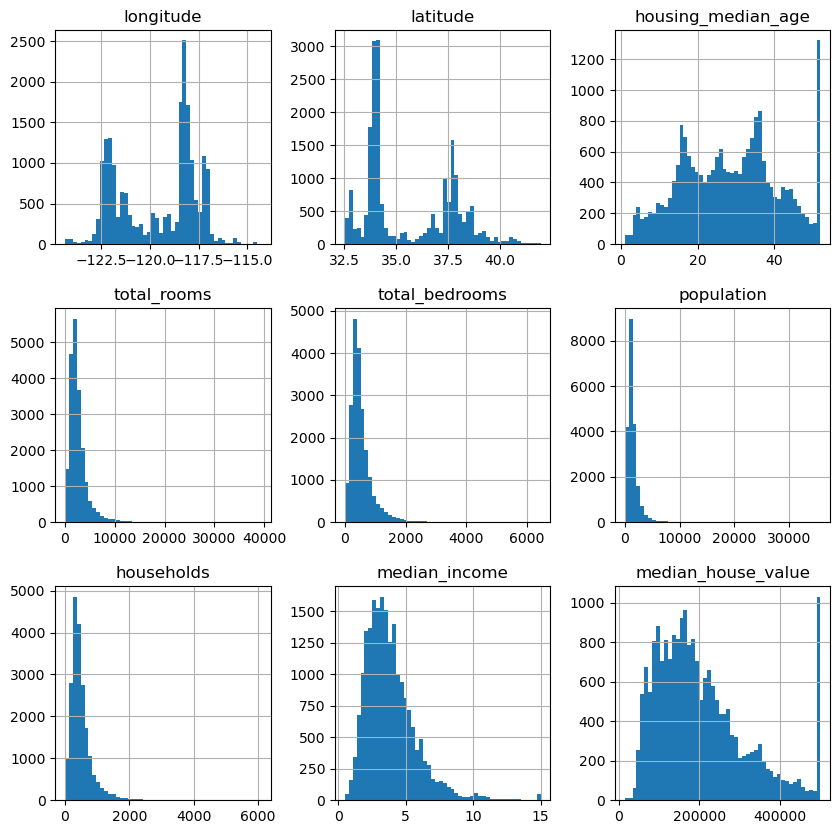

In [219]:
dt.hist(bins=50,figsize=(10,10))

<Axes: xlabel='longitude', ylabel='latitude'>

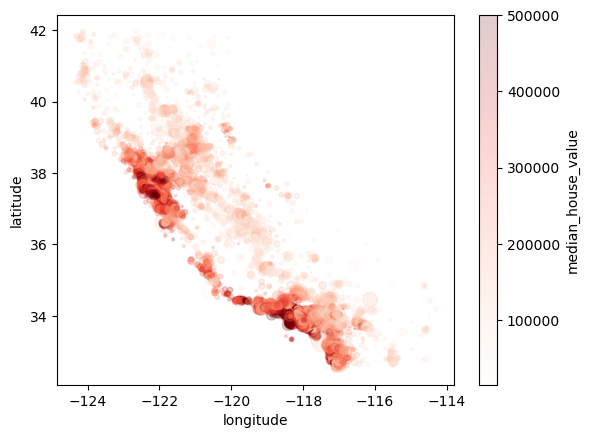

In [220]:
"""
s = size
c = right_bar value
alpha = opacity
"""
dt.plot.scatter(x="longitude",y="latitude",alpha=0.2,s=dt["population"]/100,c="median_house_value",cmap="Reds")

In [221]:
#!pip install pillow
#!pip install basemap
#!pip install basemap-data-hires

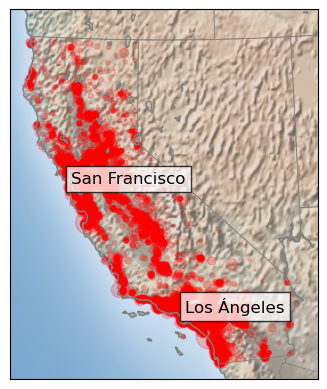

In [222]:
# CON MAPA DE CIUDAD

from matplotlib import pyplot as plt
import mpl_toolkits
from mpl_toolkits.basemap import Basemap



m = Basemap(projection='lcc',
            resolution='h',
            lat_0=37.5,
            lon_0=-119,
            width=1E6,
            height=1.2E6,)

m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.scatter( dt["longitude"], dt["latitude"],
           alpha=0.2,
           latlon=True,
           s=dt["population"]/100,facecolor='red')

x, y = m(-118.243683, 34.052235)
plt.text(x, y, 'Los Ángeles', fontsize=12, bbox=dict(facecolor="white", alpha=0.75));

x, y = m(-122.431297, 37.773972)
plt.text(x, y, 'San Francisco', fontsize=12, bbox=dict(facecolor="white", alpha=0.75));


In [223]:

dt2 = dt.copy()
dt2 = dt2.drop("ocean_proximity", axis=1)

# TABLA DE CORRELACIÓN
corr_matrix = dt2.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

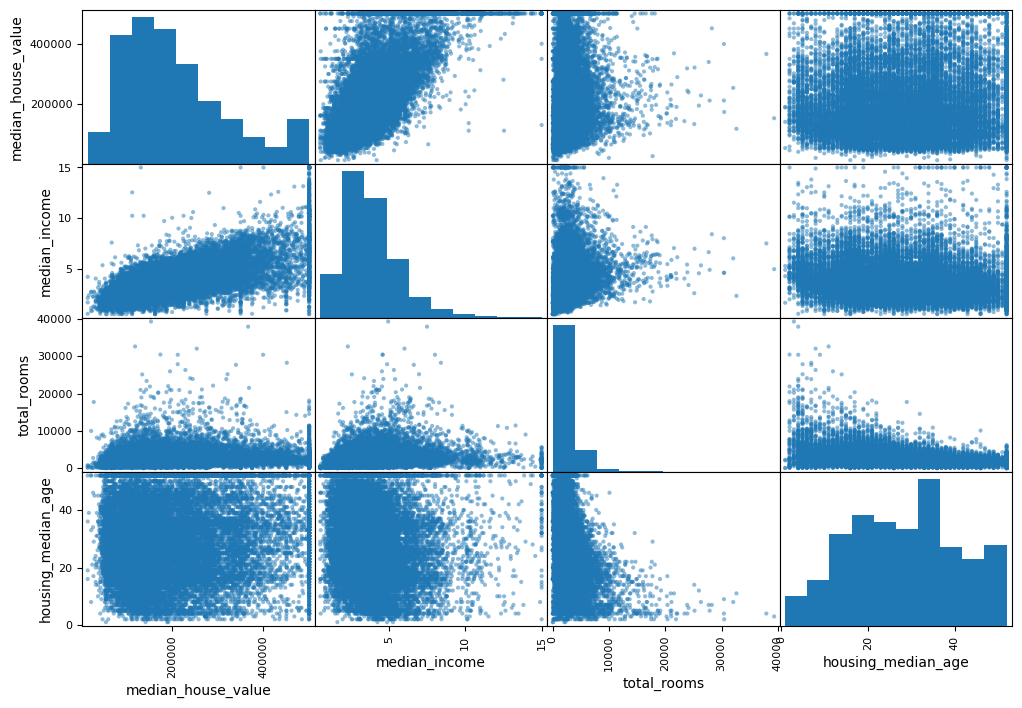

In [224]:
from pandas.plotting import scatter_matrix
atributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(dt[atributes], figsize=(12,8))

In [225]:
dt2["rooms_per_household"] = dt2["total_rooms"]/dt2["households"]
dt2["bedrooms_per_rooms"] = dt2["total_bedrooms"]/dt2["total_rooms"]
dt2["population_per_household"] = dt2["population"]/dt2["households"]

In [226]:
corr_matrix = dt2.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_rooms         -0.255880
Name: median_house_value, dtype: float64

<Axes: xlabel='bedrooms_per_rooms', ylabel='median_house_value'>

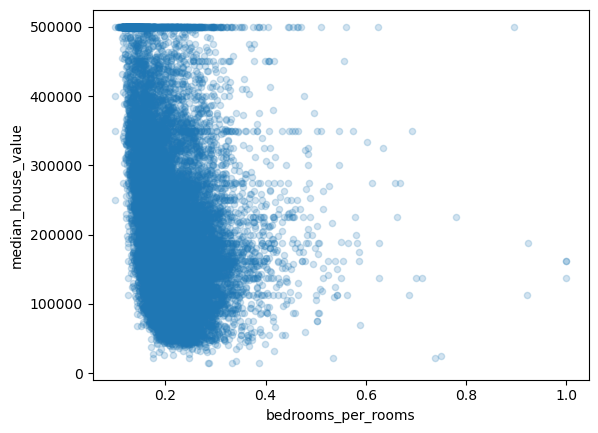

In [227]:
dt2.plot(kind="scatter", x="bedrooms_per_rooms", y="median_house_value",alpha=0.2)

# **LIMPIEZA DE DATOS**

<Axes: >

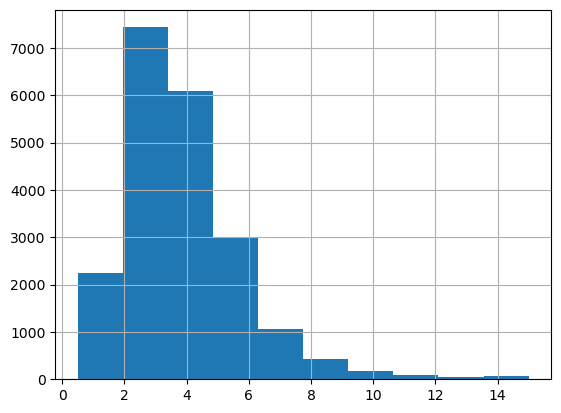

In [228]:
dt["median_income"].hist()

In [229]:
import numpy as np
dt["income_cat"] = pd.cut(dt["median_income"],
                             bins=[0.0, 1.5, 3, 4.5, 6, np.inf],
                             labels=[1,2,3,4,5])

In [230]:
dt["income_cat"] = pd.to_numeric(dt["income_cat"])
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  income_cat          20640 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


<Axes: >

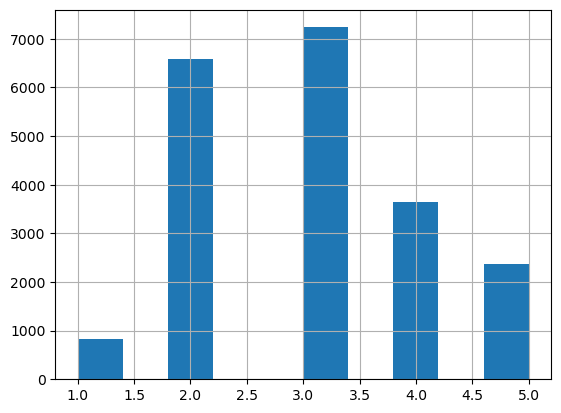

In [231]:
dt["income_cat"].hist()

In [232]:
(dt["income_cat"].value_counts()/len(dt))

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [233]:
media = dt["total_bedrooms"].median()
dt["total_bedrooms"].fillna(media, inplace=True)

In [234]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  income_cat          20640 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


In [235]:
housing_cat=dt[["ocean_proximity"]]
print(housing_cat)
housing_cat.value_counts()

      ocean_proximity
0            NEAR BAY
1            NEAR BAY
2            NEAR BAY
3            NEAR BAY
4            NEAR BAY
...               ...
20635          INLAND
20636          INLAND
20637          INLAND
20638          INLAND
20639          INLAND

[20640 rows x 1 columns]


ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
Name: count, dtype: int64

In [236]:
# Si estuviesen ordenados

from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
# ENTRENAMOS EL TRANSFORM
housing_cat_encoder = oe.fit_transform(housing_cat)
housing_cat_encoder[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [237]:
oe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [238]:
from scipy import sparse
from sklearn.preprocessing import OneHotEncoder

# FORMA BUENA, CREA UN ARRAY DEL VALOR QUE SERÁ EN FORMA DE ARRAY DE LAS 5 CATEGORÍAS
# SPARSE=FALSE SON ARRAYS NORMALES
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_hot = cat_encoder.fit_transform(housing_cat)
housing_cat_hot

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [239]:
# ESTÁ INDEXADO, PARA NO PILLARLO ENTRE () HAY QUE RECOGER EL 0
col_aux = [cat for cat in cat_encoder.categories_[0]]

daux = pd.DataFrame(housing_cat_hot, columns = col_aux)

dtCategory = dt.copy()

dtCategory = dtCategory.join(daux)
dtCategory

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2,0.0,1.0,0.0,0.0,0.0


In [240]:
dtCategory.drop(["ocean_proximity"],axis=1,inplace=True)

# **UTILIZAREMOS EL 80% PARA ENTRENAR Y EL 20% PARA TEST REVUELTOS**

In [241]:
def split_train_test(data,test_ratio):
    # indices = [i for i in range(len(data))]; indices = np.shuffle(.....)
  # NOS DA UNA LSITA BARAJADA
  indices = np.random.permutation(len(data))
  # LE DECIMOS CUANTO TEST SE USARÁ
  lg_test = int(len(data) * test_ratio)
  # SE REPARTEN
  test_indices = indices[:lg_test]
  train_indices = indices[lg_test:]
  # Y SE DEVUELVE UNA TABLA DE ENTRENAMIENTO Y OTRA DE TEST
  return data.iloc[train_indices], data.iloc[test_indices]

In [242]:
np.random.seed(42)
dt_train,dt_test = split_train_test(dtCategory,0.2)

In [243]:
len(dt_train), len(dt_test), (len(dt_test)*100)/(len(dt_train)+len(dt_test))

(16512, 4128, 20.0)

In [244]:
y_train = dt_train["median_house_value"].copy()
x_train = dt_train.drop(["median_house_value"],axis=1)

In [245]:
# EN CASO NORMAL PRESCINDIRIAMOS DE COLUMNAS, LAS QUE NO SIRVIERAN PARA NADA PARA NOSOTROS
x_train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,3,0.0,0.0,0.0,0.0,1.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,3,0.0,0.0,0.0,0.0,1.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,3,0.0,0.0,0.0,0.0,1.0


# **MODELO DE REGRESIÓN LINEAL**

In [246]:
y_train = dt_train["median_house_value"].copy()
x_train = dt_train.drop("median_house_value", axis=1)
x_train = dt_train[["housing_median_age", "total_rooms", "median_income"]]

In [247]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

# MÓDELO CREADO

LinearRegression()

In [248]:
# VAMOS A COGER UNOS CUANTOS REGISTROS DE X_TRAIN Y LE VAMOS A PEDIR QUE PREDIGA
datos_prueba =  x_train.iloc[:5]
print("PREDICCIONES: ",lin_reg.predict(datos_prueba))
y_reales = y_train.iloc[:5]
print("Reales: ", list(y_reales))

# ESTA CERCA PERO NO ES EXACTO

PREDICCIONES:  [191241.19032347 247421.98530848 167458.91940355 134423.69271645
 220699.12183606]
Reales:  [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


In [249]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

predicciones = lin_reg.predict(x_train)
mse = mean_squared_error(y_train, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_train, predicciones)
score = r2_score(y_train, predicciones)
# No lo realiza tan mal
print(f"mae(ERROR MEDIO ABSOLUTO): {mae}   mse(ERROR CUADRÁTICO): {mse}    r2_score: {score}")

mae(ERROR MEDIO ABSOLUTO): 59986.95523463257   mse(ERROR CUADRÁTICO): 80335.34309584109    r2_score: 0.5172148009737971


In [250]:
# regresión Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [251]:
predicciones = tree_reg.predict(x_train)
mse = mean_squared_error(y_train, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_train, predicciones)
score = r2_score(y_train, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

mae: 0.0   rmse: 0.0 r2_score: 1.0


In [252]:
"""
    NO SE DEBE USAR DATOS DE TEST ES SOLO PRUEBA
"""

y_test = dt_test["median_house_value"].copy()
x_test = dt_test.drop("median_house_value", axis=1)
x_test = dt_test[["housing_median_age", "total_rooms", "median_income"]]

predicciones = tree_reg.predict(x_test)
mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicciones)
score = r2_score(y_test, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

mae: 79749.89244186046   rmse: 109820.45553929616 r2_score: 0.07963600256702663


In [253]:
# Validación de tipo Cross-Lineal
from sklearn.model_selection import cross_val_score

lin_score = cross_val_score(lin_reg, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
root_lin_score = np.sqrt(-lin_score)
print("Scores: ", root_lin_score)
print("Media: ", root_lin_score.mean())
print("Desviación Std", root_lin_score.std())

Scores:  [77844.26670927 83074.03153461 79783.37858762 78294.91990665
 82458.25599305 79879.373579   77608.14437611 82148.77060192
 79589.03991482 82628.37269221]
Media:  80330.85538952649
Desviación Std 1985.6842361409117


In [254]:
# Validación en cross (Árbol de decisión)
from sklearn.model_selection import cross_val_score

lin_score = cross_val_score(tree_reg, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
root_lin_score = np.sqrt(-lin_score)
print("Scores: ", root_lin_score)
print("Media: ", root_lin_score.mean())
print("Desviación Std", root_lin_score.std())

Scores:  [110277.73425958 110916.78935776 107487.69801765 109756.24939645
 110628.75584276 112096.61489884 108119.64667903 114592.53650052
 105454.92292293 111068.14525788]
Media:  110039.90931334005
Desviación Std 2418.464287774568


In [259]:
# regresión random forest

"""
    DE LO MÁS UTILIZADO
"""
# regresión random forest
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100)

rf_reg.fit(x_train, y_train)

predicciones = rf_reg.predict(x_test)
mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicciones)
score = r2_score(y_test, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

rf_score = cross_val_score(rf_reg, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
root_lin_score = np.sqrt(-rf_score)
print("RF cross")
print("Scores: ", root_lin_score)
print("Media: ", root_lin_score.mean())
print("Desviación Std", root_lin_score.std())


mae: 59543.96311531008   rmse: 80350.87185716839 r2_score: 0.5073093427004738
RF cross
Scores:  [79383.33972285 81677.00146019 79227.58385905 80112.44990571
 83381.41784564 80088.63841734 77514.38557665 82206.16832375
 78758.04567268 82556.49454755]
Media:  80490.55253314025
Desviación Std 1787.7604332306046


In [256]:
# regresión SVM
from sklearn.svm import SVR

sv_reg = SVR()

sv_reg.fit(x_train, y_train)

predicciones = sv_reg.predict(x_test)
mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicciones)
score = r2_score(y_test, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

rf_score = cross_val_score(sv_reg, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
root_lin_score = np.sqrt(-rf_score)
print("SV cross")
print("Scores: ", root_lin_score)
print("Media: ", root_lin_score.mean())
print("Desviación Std", root_lin_score.std())

mae: 87331.8066102977   rmse: 117216.47266183165 r2_score: -0.048504832569613354


KeyboardInterrupt: 

In [ ]:
#!conda install xgboost

In [258]:
# regresión XG BOOST
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objetive="reg:squarederror")

xgb_reg.fit(x_train, y_train)

predicciones = xgb_reg.predict(x_test)
mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicciones)
score = r2_score(y_test, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

rf_score = cross_val_score(xgb_reg, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
root_lin_score = np.sqrt(-rf_score)
print("XGB cross")
print("Scores: ", root_lin_score)
print("Media: ", root_lin_score.mean())
print("Desviación Std", root_lin_score.std())

[20:46:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.

mae: 57679.45095517654   rmse: 78402.73691158637 r2_score: 0.5309106349775488
[20:46:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.

[20:46:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.

[20:46:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.

[20:46:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.

[20:46:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.

[20:46:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376